In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="darkgrid")
a=pd.read_csv("C:\\Users\Ogeid99\Desktop\DS\excel\catalogo_l'aquila.txt",sep='|')
a

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,1857689,2008-10-14T02:21:50.850000,42.235,13.515,13.1,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,2 km E Rocca di Cambio (AQ)
1,1861549,2008-10-30T02:16:37.440000,42.323,13.491,8.8,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.4,--,3 km N Fossa (AQ)
2,1863429,2008-11-10T01:56:14.140000,42.409,13.539,9.1,BULLETIN-SISPICK,NaN,NaN,NaN,ML,2.0,--,10 km N Poggio Picenze (AQ)
3,1868139,2008-12-12T18:58:51.600000,42.204,13.387,5.0,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.9,--,9 km W Rocca di Cambio (AQ)
4,1868339,2008-12-14T08:16:54.180000,42.356,13.467,9.3,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,6 km E L'Aquila (AQ)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,2132989,2009-11-19T16:20:21.220000,42.417,13.387,8.7,BULLETIN-SISPICK,NaN,NaN,NaN,ML,2.0,--,7 km N L'Aquila (AQ)
9115,2132999,2009-11-19T16:21:54.780000,42.410,13.376,10.0,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,7 km N L'Aquila (AQ)
9116,2133549,2009-11-20T22:45:50.530000,42.486,13.362,10.8,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.6,--,6 km SE Capitignano (AQ)
9117,2133719,2009-11-21T08:34:39.570000,42.471,13.356,16.1,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.4,--,6 km NE Pizzoli (AQ)


In [3]:
import math
binning=0.2
Mmin=1.4
#evaluation of maximum likelihood B^
magnitude=a['Magnitude']
b=math.log10(math.exp(1)/(np.mean(magnitude)-(Mmin-binning/2)))
b

0.6935293292684002

(0.7, 10000)

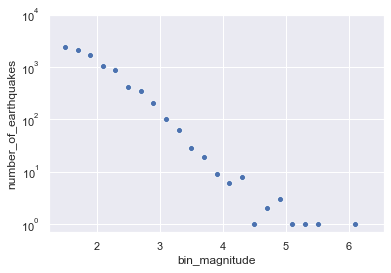

In [2]:
import math
binning=0.2
Mmin=1.4
#evaluation of maximum likelihood B^
magnitude=a['Magnitude']
b=math.log10(math.exp(1)/(np.mean(magnitude)-(Mmin-binning/2)))
#b=math.log(1/(np.mean(magnitude)-(Mmin-binning/2))(math.log(10)) according to 'a non robust method to estimate the b value'
#plot Gutemberg-Richter
bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.2)))
number_of_earthquakes= pd.Series(np.array([np.count_nonzero((magnitude >= i ) & (magnitude <= i+0.2))
                                           for i in bin_magnitude]))
bin_magnitude=np.add(bin_magnitude,0.1)
df=pd.concat([bin_magnitude,number_of_earthquakes],axis=1)
df.columns=['bin_magnitude','number_of_earthquakes']

plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 10000)) # DO NOT put 0 or negative values 'cause there is a log scale


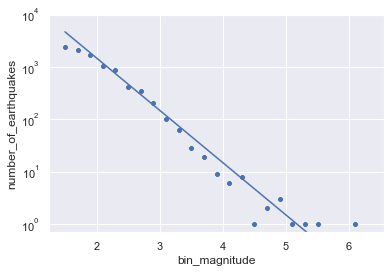

In [3]:
#remember to see a value on zmap
a=5.175
Gutemberg_Richter=np.power(10,5.175-bin_magnitude) #here you can consider b or not
plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 10000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.plot(bin_magnitude,Gutemberg_Richter)

exponential_distribution=np.power(10,5.175-np.arange(np.min(magnitude),np.max(magnitude),0.1)) #insert b 


In [4]:
new_bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.05)))
new_Gutemberg_Richter=np.power(10,5.175-new_bin_magnitude) #here you can consider b or not
sumGR=new_Gutemberg_Richter.sum()
probabilities=np.divide(new_Gutemberg_Richter,sumGR)
probabilities

0     0.108750
1     0.096924
2     0.086384
3     0.076989
4     0.068617
        ...   
93    0.000002
94    0.000002
95    0.000002
96    0.000002
97    0.000002
Length: 98, dtype: float64

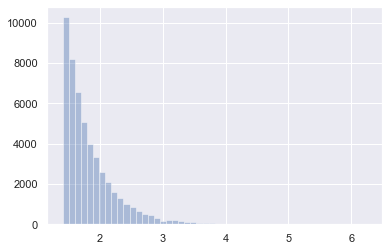

In [6]:
#draw from an exponential distribution
#for i in new_bin_magnitude:
new_bin_df=pd.Series(new_bin_magnitude)
ranger=range(1000)
for i in ranger:
    random_sample=np.random.choice(new_bin_magnitude,50000,p=probabilities)
    counts=np.array([])
    for j in new_bin_magnitude:
        counts=pd.Series(np.append(counts,np.count_nonzero(random_sample==j)))
    new_bin_df=pd.concat([new_bin_df,counts],axis=1)
new_bin_df.columns=[s for s in range(len(ranger)+1)]
new_bin_df

#sns.distplot(random_sample,kde=False)

#plt.yscale('log')

In [7]:
#create a dataset magnitude-bin/number of count in the sample 
new_bin_df2=new_bin_df.T
new_bin_df2
binned_array=new_bin_df2.loc[0,:]
dropped_new_bin_df2=new_bin_df2.drop([0])  #drop row if axis=0 and columns if 1
dropped_new_bin_df2.columns=binned_array
dropped_new_bin_df2

,1.40,1.45,1.50,1.55,1.60,1.65,1.70,1.75,1.80,1.85,...,5.80,5.85,5.90,5.95,6.00,6.05,6.10,6.15,6.20,6.25
1,5432.0,4832.0,4305.0,3853.0,3464.0,3022.0,2809.0,2457.0,2124.0,1913.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5460.0,4984.0,4271.0,3754.0,3346.0,2981.0,2714.0,2332.0,2155.0,1894.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5548.0,4907.0,4278.0,3853.0,3472.0,2972.0,2758.0,2424.0,2175.0,1916.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5404.0,4886.0,4324.0,3741.0,3484.0,3064.0,2754.0,2396.0,2165.0,1882.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,5411.0,4859.0,4308.0,3875.0,3481.0,3041.0,2698.0,2423.0,2192.0,1942.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,5471.0,4723.0,4247.0,3871.0,3371.0,3088.0,2817.0,2429.0,2235.0,1881.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
997,5442.0,4798.0,4408.0,3827.0,3400.0,3115.0,2682.0,2405.0,2209.0,1906.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,5249.0,4910.0,4366.0,3821.0,3446.0,3113.0,2717.0,2479.0,2107.0,1910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,5366.0,4955.0,4221.0,3881.0,3512.0,3079.0,2671.0,2469.0,2150.0,1998.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


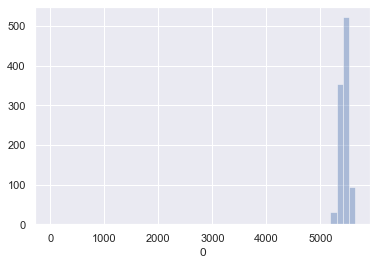

In [8]:
#plot count of each bin
sns.distplot(new_bin_df2[new_bin_df2.columns[0]],kde=False) #explain the differences between
#samples with high and low magnitudes

In [9]:
#it calculates p95 and p5
from scipy.stats import poisson, kstest
low=np.array([])
up=np.array([])
medium=np.array([])
KS=np.array([])
mean_arr=np.array([])
for i in dropped_new_bin_df2: #iterate over columns
    mean_c=dropped_new_bin_df2[i].mean()
    mean_arr=np.append(mean_arr,mean_c)
    low=np.append(low,poisson.ppf(0.05, mean_c))
    up=np.append(up,poisson.ppf(0.95, mean_c))
    KS=np.append(KS,kstest( dropped_new_bin_df2[i] ,'norm')) #KS test
    #cumulate curve
    np.add.accumulate(dropped_new_bin_df2[i]) #cut this
    
    
KS


array([1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0

Text(0, 0.5, 'Number of events')

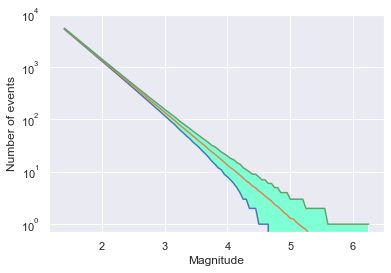

In [14]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax1=ax.plot(binned_array,low)
ax2=ax.plot(binned_array,mean_arr)
ax3=ax.plot(binned_array,up)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.set_ylim((0.7, 10000))
ax.fill_between(binned_array, low, up, where=up >= low, facecolor='aquamarine', interpolate=True)
ax.set_xlabel('Magnitude')
ax.set_ylabel('Number of events')

In [15]:
#cumulate data set
dropped_new_bin_df2_cum=dropped_new_bin_df2.T
columns_to_sort=[i for i in dropped_new_bin_df2_cum]
low_accumulate=np.array([])
up_accumulate=np.array([])
medium_accumulate=np.array([])
binned_array.index=binned_array
dropped_new_bin_df2_cumulate=binned_array
for i in dropped_new_bin_df2_cum: #iterate over columns
    cum_series=pd.Series(dropped_new_bin_df2_cum[i])
    cum_series=pd.Series(np.add.accumulate(cum_series.sort_values(ascending=True)))
    #cum_series=cum_series.reset_index(drop=True,inplace=True)
    dropped_new_bin_df2_cumulate=pd.concat((dropped_new_bin_df2_cumulate,cum_series),axis=1)
    #dropped_new_bin_df2_cumulate=dropped_new_bin_df2_cumulate.reshape((2,98))

dropped_new_bin_df2_cumulate=dropped_new_bin_df2_cumulate.T.drop([0])
dropped_new_bin_df2_cumulate


,1.40,1.45,1.50,1.55,1.60,1.65,1.70,1.75,1.80,1.85,...,5.80,5.85,5.90,5.95,6.00,6.05,6.10,6.15,6.20,6.25
1,50000.0,44568.0,39736.0,35431.0,31578.0,28114.0,25092.0,22283.0,19826.0,17702.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50000.0,44540.0,39556.0,35285.0,31531.0,28185.0,25204.0,22490.0,20158.0,18003.0,...,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,50000.0,44452.0,39545.0,35267.0,31414.0,27942.0,24970.0,22212.0,19788.0,17613.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000.0,44596.0,39710.0,35386.0,31645.0,28161.0,25097.0,22343.0,19947.0,17782.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
5,50000.0,44589.0,39730.0,35422.0,31547.0,28066.0,25025.0,22327.0,19904.0,17712.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,50000.0,44529.0,39806.0,35559.0,31688.0,28317.0,25229.0,22412.0,19983.0,17748.0,...,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
997,50000.0,44558.0,39760.0,35352.0,31525.0,28125.0,25010.0,22328.0,19923.0,17714.0,...,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
998,50000.0,44751.0,39841.0,35475.0,31654.0,28208.0,25095.0,22378.0,19899.0,17792.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,50000.0,44634.0,39679.0,35458.0,31577.0,28065.0,24986.0,22315.0,19846.0,17696.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Cumulative events')

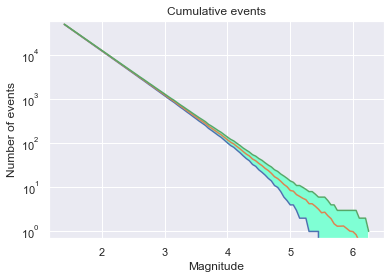

In [19]:
#cumulate function
low_cum=np.array([])
up_cum=np.array([])
medium_cum=np.array([])
KS_cum=np.array([])
mean_arr_cum=np.array([])
for i in dropped_new_bin_df2_cumulate: #iterate over columns
    mean_cc=dropped_new_bin_df2_cumulate[i].mean()
    mean_arr_cum=np.append(mean_arr_cum,mean_cc)
    low_cum=np.append(low_cum,poisson.ppf(0.05, mean_cc))
    up_cum=np.append(up_cum,poisson.ppf(0.95, mean_cc))
    KS_cum=np.append(KS_cum,kstest( dropped_new_bin_df2_cumulate[i] ,'norm')) #KS test 
#cumulate curve
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax1_cum=ax.plot(binned_array,low_cum)
ax2_cum=ax.plot(binned_array,mean_arr_cum)
ax3_cum=ax.plot(binned_array,up_cum)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.set_ylim((0.7, 60000))
ax.fill_between(binned_array, low_cum, up_cum, where=up_cum >= low_cum, facecolor='aquamarine', interpolate=True)
ax.set_xlabel('Magnitude')
ax.set_ylabel('Number of events')
ax.set_title('Cumulative events')

Text(0.5, 1.0, 'Cumulative and iterative events')

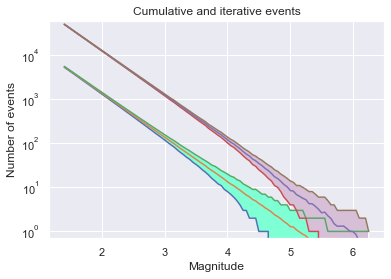

In [22]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax1=ax.plot(binned_array,low)
ax2=ax.plot(binned_array,mean_arr)
ax3=ax.plot(binned_array,up)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.fill_between(binned_array, low, up, where=up >= low, facecolor='aquamarine', interpolate=True)
ax1_cum=ax.plot(binned_array,low_cum)
ax2_cum=ax.plot(binned_array,mean_arr_cum)
ax3_cum=ax.plot(binned_array,up_cum)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.set_ylim((0.7, 60000))
ax.fill_between(binned_array, low_cum, up_cum, where=up_cum >= low_cum, facecolor='thistle', interpolate=True)
ax.set_ylim((0.7, 60000))
ax.set_xlabel('Magnitude')
ax.set_ylabel('Number of events')
ax.set_title('Cumulative and iterative events')